## Assignment 3 : Survival Analysis

In [2]:
#!pip install lifelines

In [35]:
import pandas as pd

df = pd.read_csv("Telco-Churn.csv")

In [36]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df.shape

(7043, 21)

เราต้องแปลง คอลัมน์ Churn ให้กลายเป็น Binary Classification ก่อน

In [19]:

df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored

In [23]:
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

In [24]:
kmf.survival_function_at_times(10)

10    0.854915
Name: KM_estimate, dtype: float64

Text(0.5, 1.0, 'Survival function of Telco Customers')

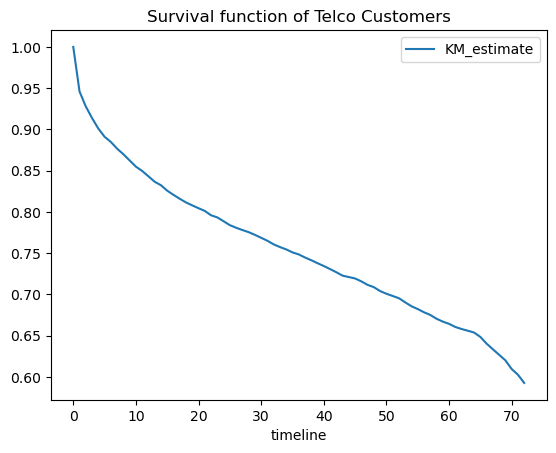

In [25]:
import matplotlib.pyplot as plt
kmf.survival_function_.plot()
plt.title('Survival function of Telco Customers')

<Axes: xlabel='timeline'>

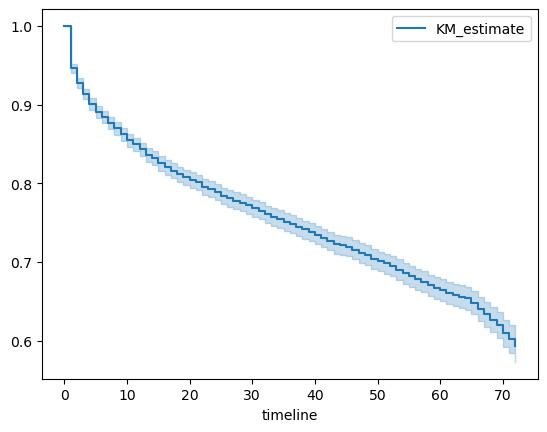

In [26]:
kmf.plot()

We can describe from this graph lioke The y-axis represents the probability of Telco, Predict behavior to retain customers.

Tenure - Number of months the customer has stayed with the company


In [27]:
kmf.median_survival_time_

inf

In [34]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()

# Remove which is 0
df = df[df['tenure'] != 0]


cph.fit(df, duration_col="tenure", event_col="Churn", show_progress=True)




cph.print_summary()

ZeroDivisionError: division by zero